<a href="https://colab.research.google.com/github/Pedroo97/Phyton-iniciante/blob/main/DEPARTAMENTO_DE_RECURSOS_HUMANOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEPARTAMENTO DE RECURSOS HUMANOS

# IMPORTAÇÃO DAS BIBLIOTECAS E BASE DE DADOS

In [3]:
import pandas as pd #biblioteca usada para carregamento de arquivos ou base de dados
import numpy as np #biblioteca usada para recursos matemáticos
import seaborn as sns #biblioteca usada para gráficos 
import matplotlib.pyplot as plt #biblioteca usada para visualização de dados



In [4]:
employee_df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv') #upload da base de dados 

In [5]:
employee_df.head() #comando que retorna os cinco primeiros registros 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
employee_df.info() #mostra informações adicionais de todas colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
employee_df.describe() #para vizualizar estatísticas dos atributos númericos da base de dados

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# VISUALIZAÇÃO DOS DADOS

In [8]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [9]:
employee_df.head() #mostrar os cinco primeiros registros

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


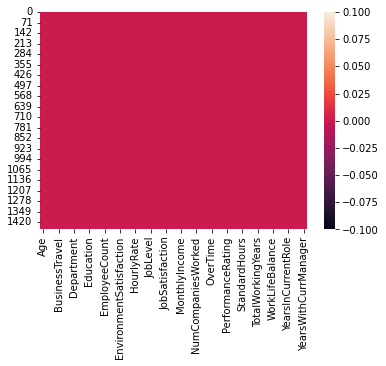

In [10]:
sns.heatmap(employee_df.isnull()); #retorna os valores nulos se houver

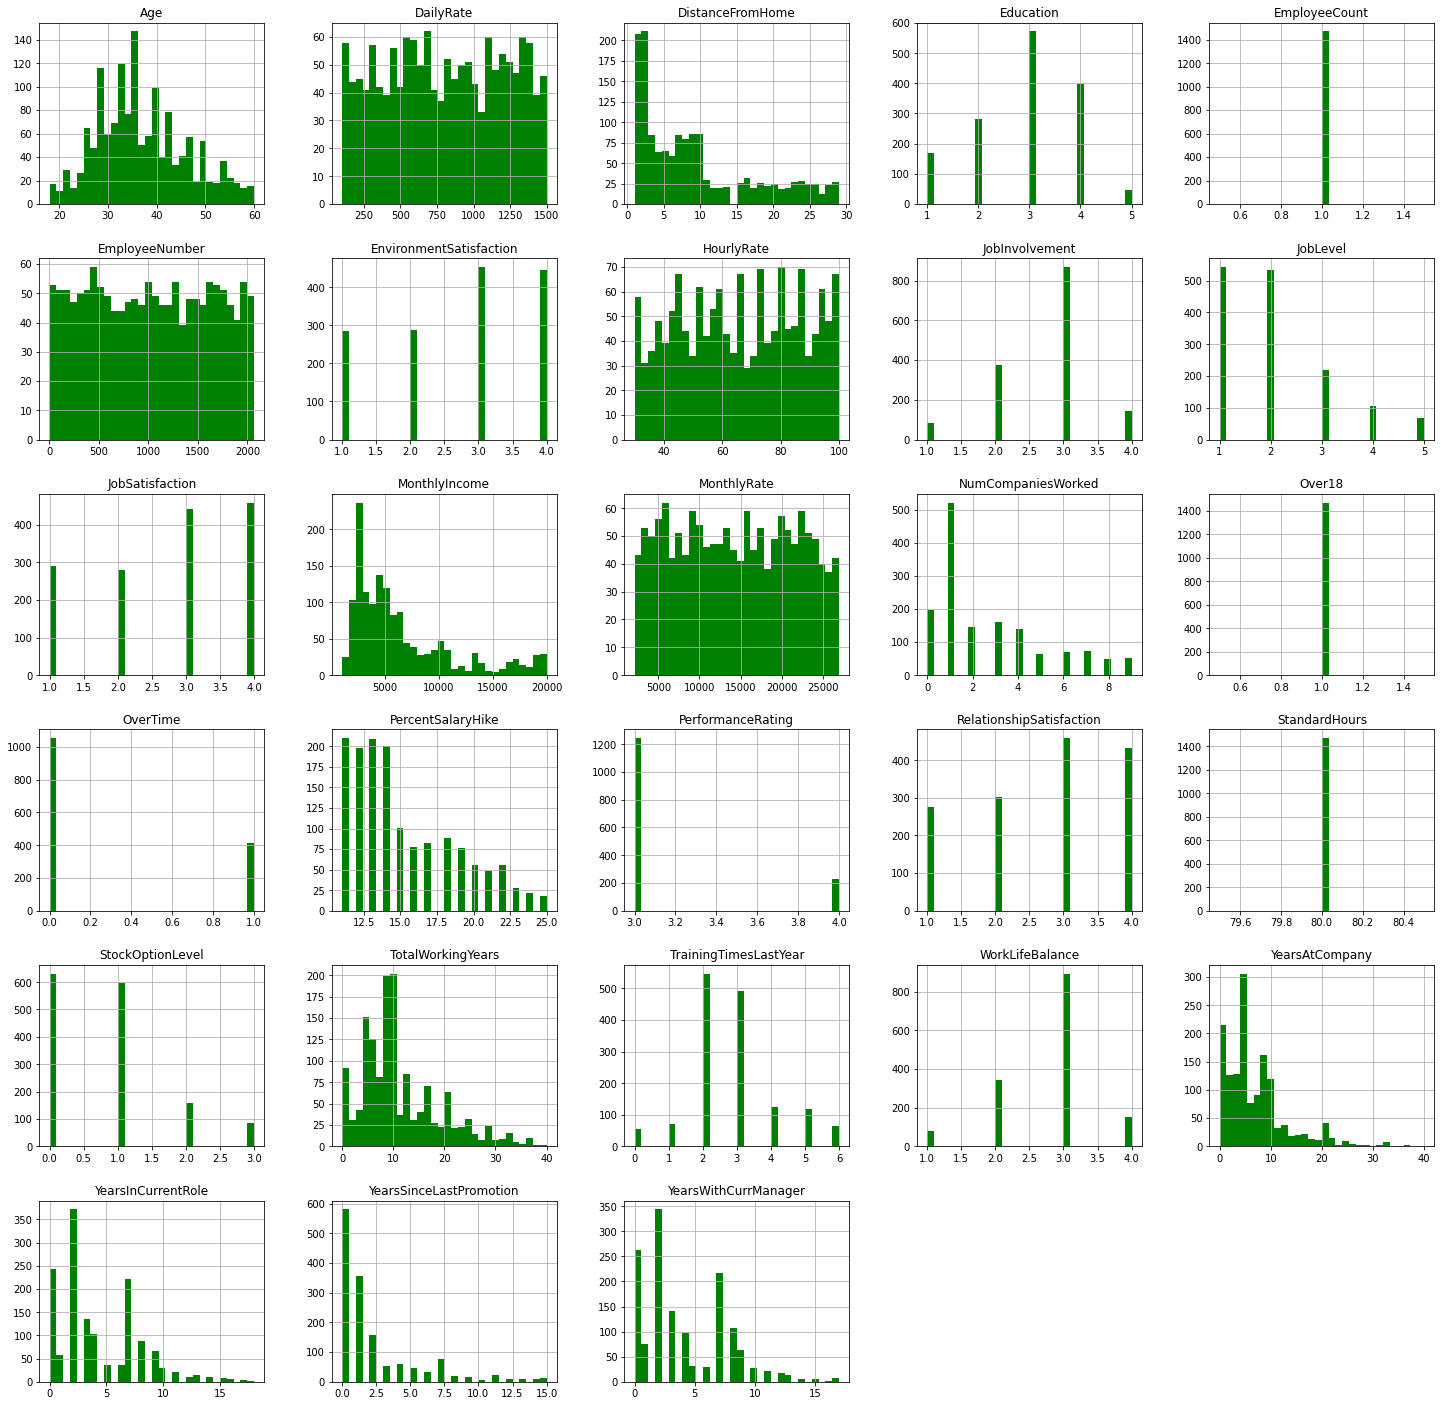

In [11]:
employee_df.hist(bins = 30, figsize=(25,25), color = 'g' ); #histograma para cada atributo da base de dados
#figsize é o tamanho do gráfico
#bins serve para criar faixa de valores

In [12]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)
 #comando para exclusão de atributos irrelevante


In [13]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [15]:
print('Total = ', len(employee_df))
print('Número de funcionários que saíram da empresa = ', len(left_df))
print('Porcentagem de funcionários que saíram da empresa = ', (len(left_df) / len(employee_df)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(stayed_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(stayed_df) / len(employee_df)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


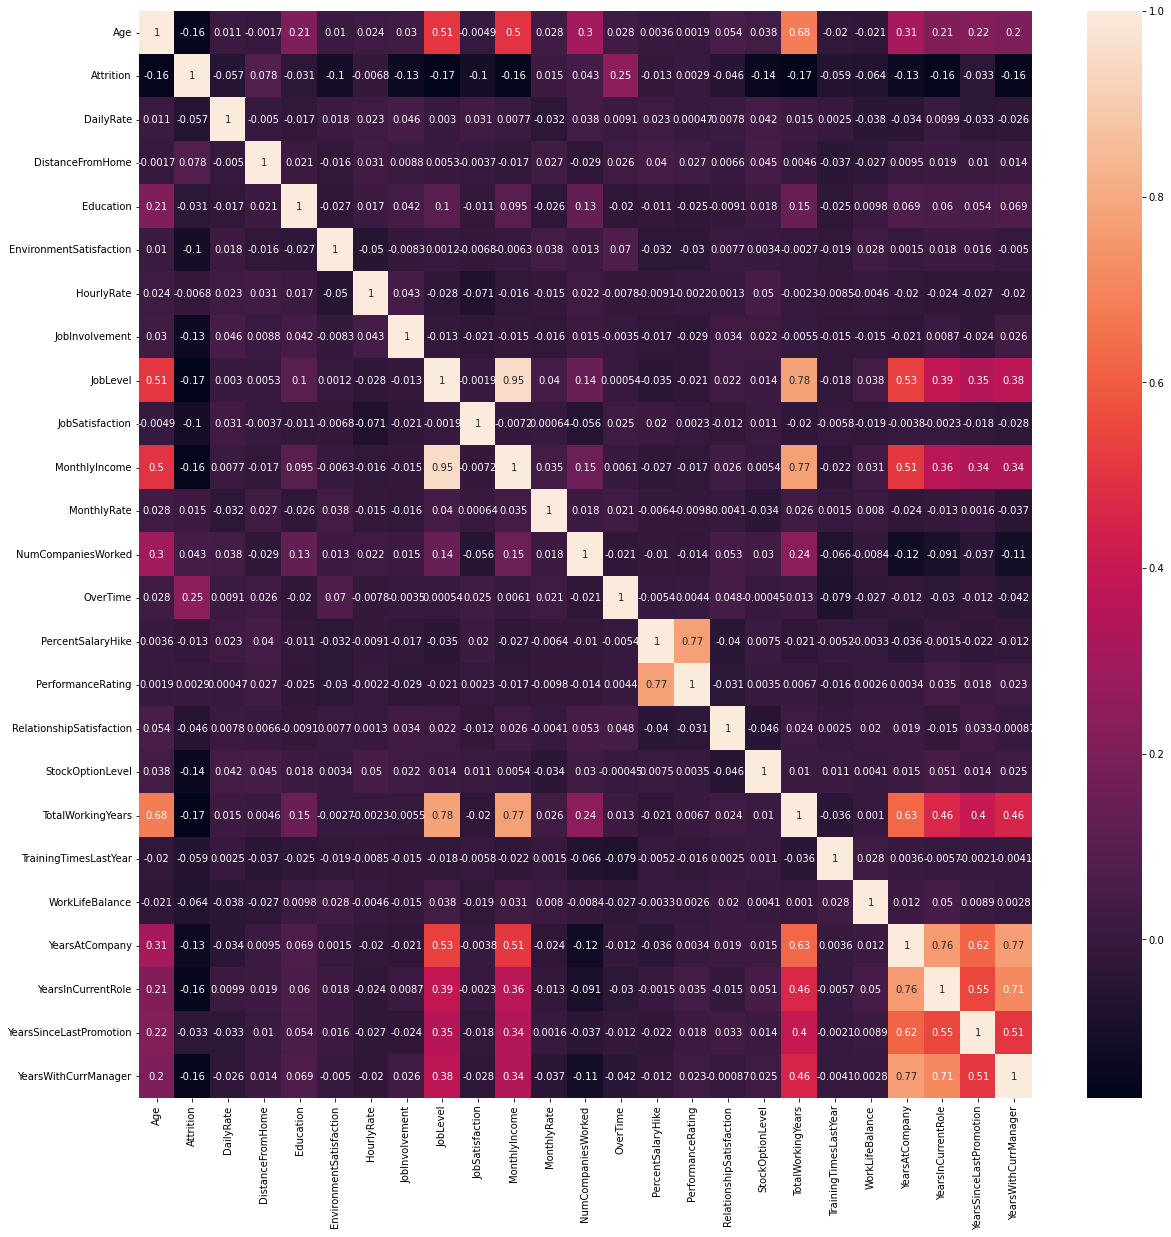

In [16]:
correlations = employee_df.corr() # calculo estatístico que compara todos atributos
f, ax = plt.subplots(figsize = (20,20)) #gerar subgráficos
sns.heatmap(correlations,annot=True); #mostra os valores de correlações

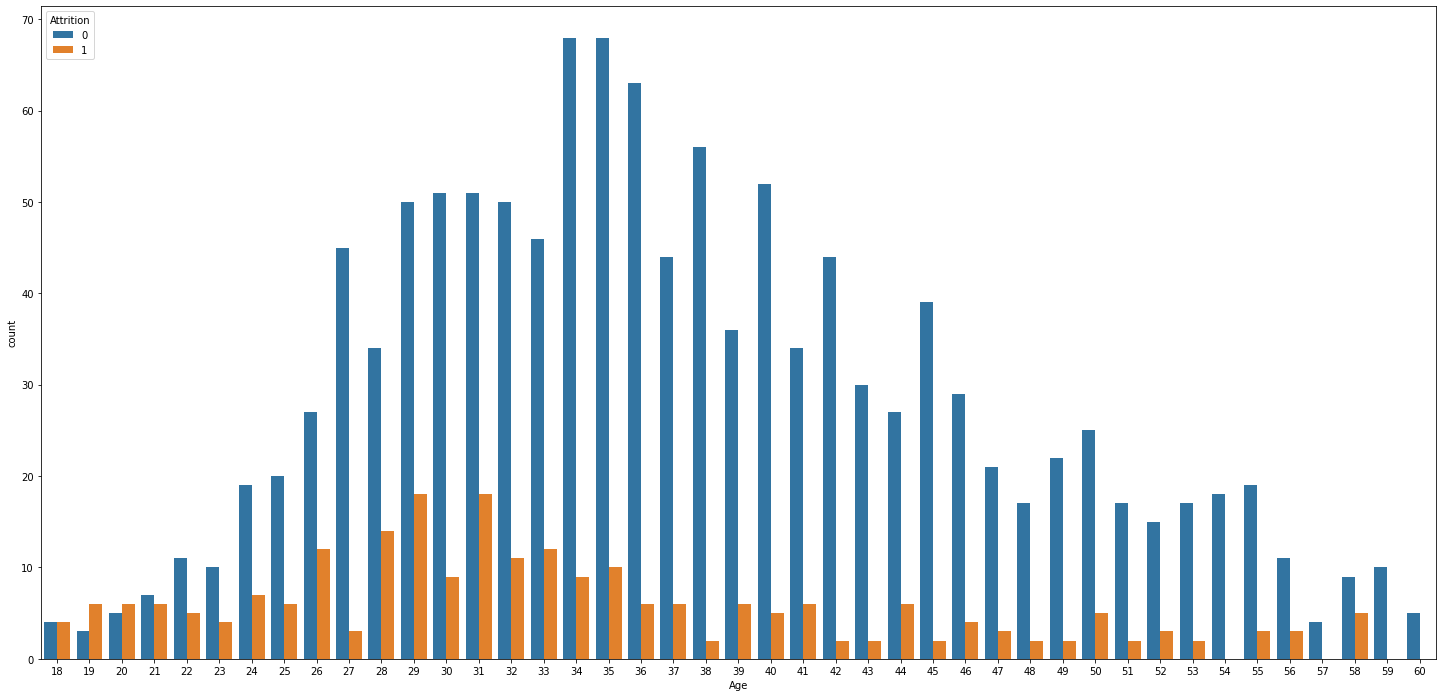

In [17]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=employee_df);
#agrupamento de padrões em tendências em permanecer ou sair da empresa

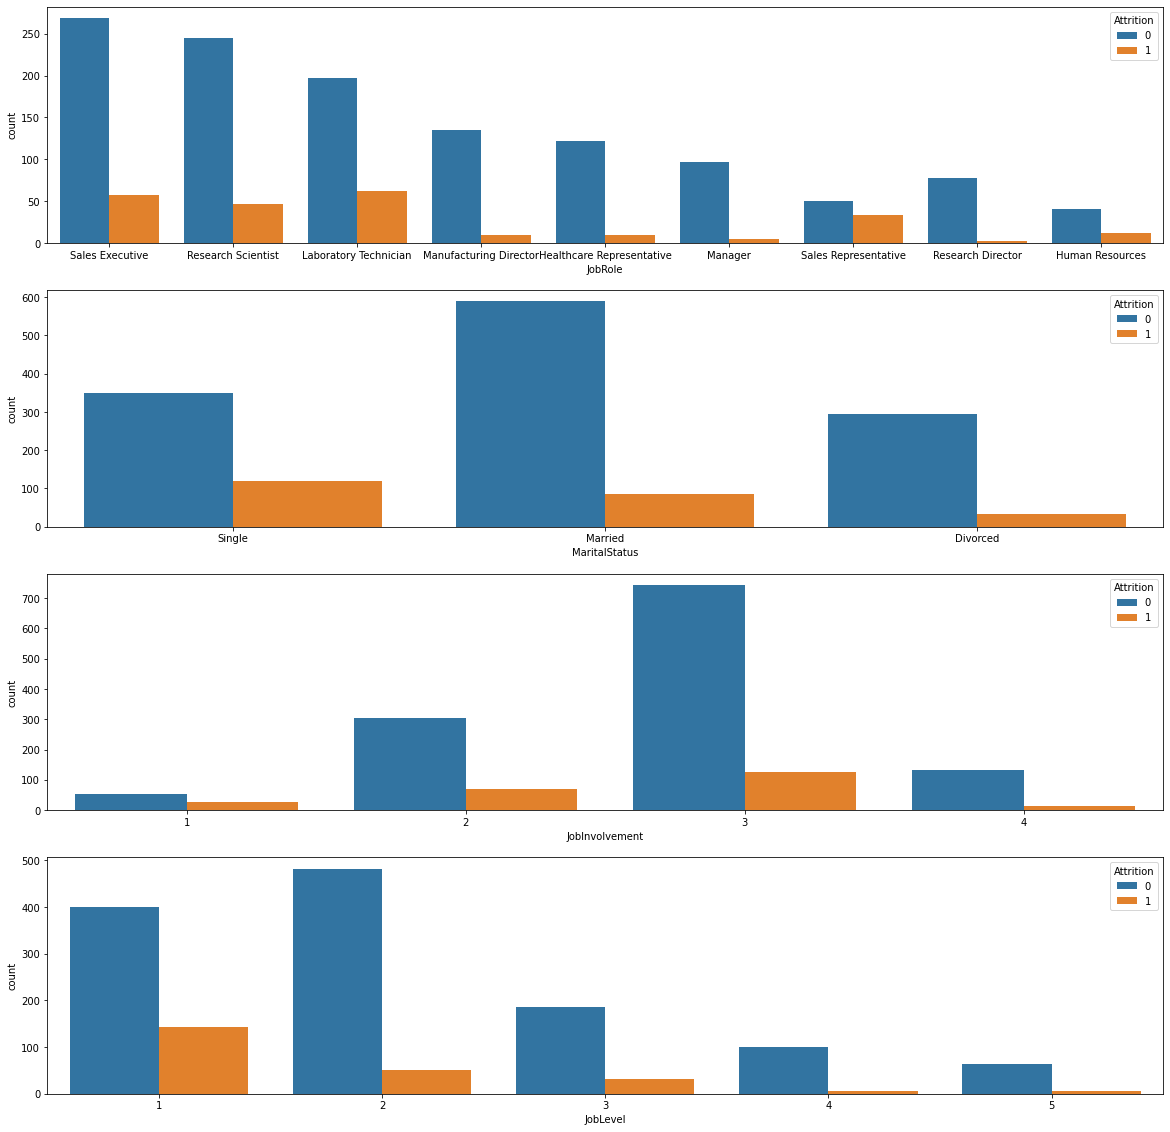

In [18]:
plt.figure(figsize=[20,20]) #definindo tamanho do gráfico
plt.subplot(411) #gerando subgráficos #numero 4 indica números de linhas #número 1 indica o gráfico opr coluna e o outro número 1 indica o ID do gráfico
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df) #hue é usando para fazer o agrupamento de atributos
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)
#atributos para indentificar se há algum tipo de padrão

No gráficos acima de evasão dos cargos da empresa, essa variável foi analisada por Job Role (cargo de trabalho), Marital Status (estado civil), Job Involvement (envolvimento no trabalho) e Job Level (nivel de emprego).

- Job Role (cargo de trabalho) neste gráfico nota-se que as pessoas que mais saem da empresa são os Sales Representative (representantes de vendas).

- Marital Status (estado civil)  neste gráfico nota-se que as pessoas que mais saem da empresa são os Singles (solteiros).

- Job Involvement (envolvimento no trabalho). Foi realizada uma pesquisa pelo RH com os funcionários em relação ao grau de envolvimento no trabalho, com isso os funcionários que mais saem são os que deram nota 3 com grau de envolvimento no trabalho.

- Job Level (nivel de emprego) as colunas com os números maiores são os funcionários que tem os melhores cargos e salários. A grande maioria que estão situados na coluna 1 são os que provavelmente tem os menores salários e cargos, sendo assim respectivamente os que mais saem dos cargos que ocupam.



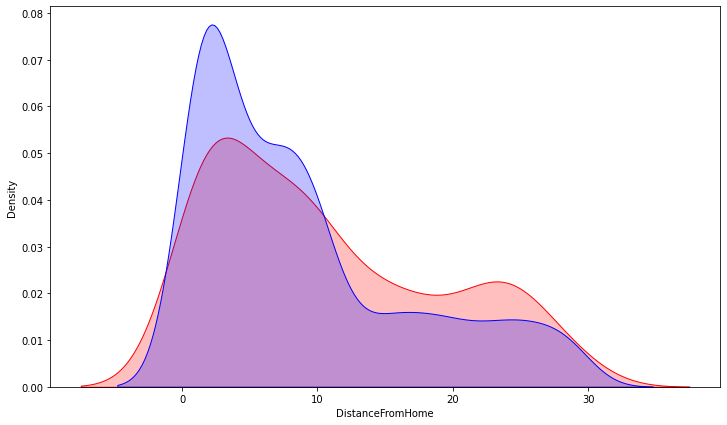

In [19]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r') 
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');

- No eixo X temos a distância.
- No eixo Y valores que informam a desindade de probabilidade.

-A maioria dos funcionários que permanecem na empresa moram entre 1 e 3 KM de distância da empresa.  

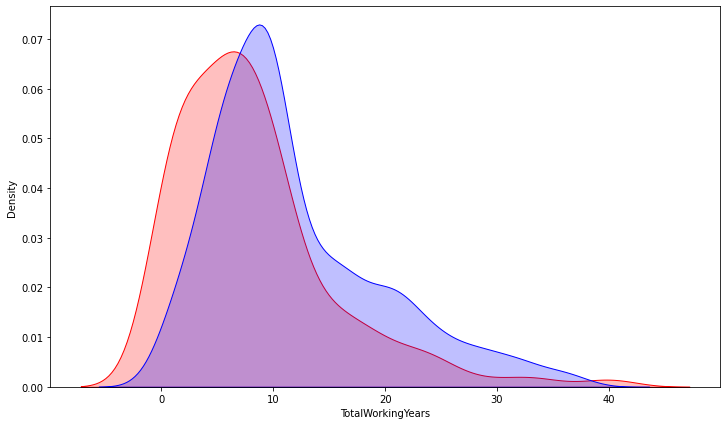

In [20]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b');

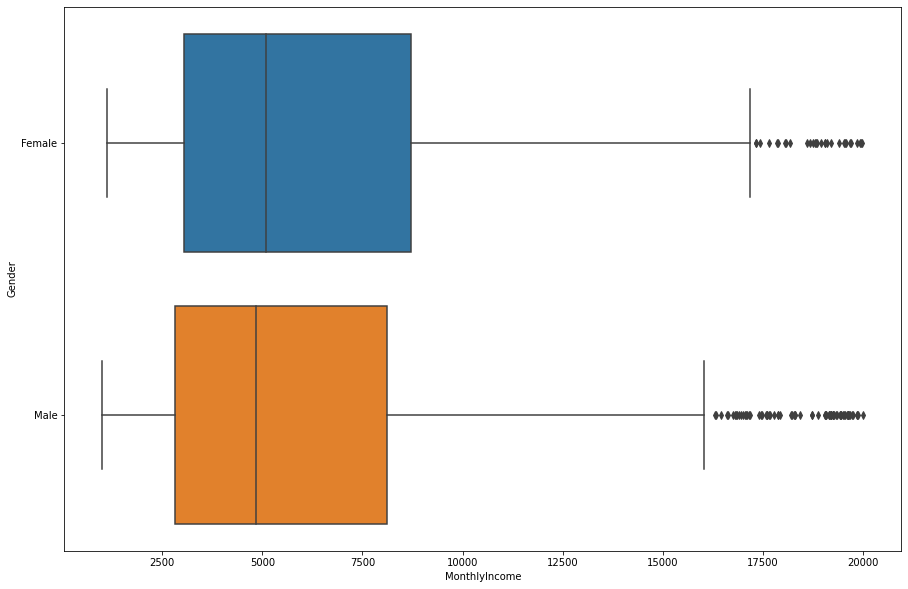

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=employee_df);


- No eixo X temos a representação de valores de salários.

- No eixo Y temos a representação de gênero sexual.

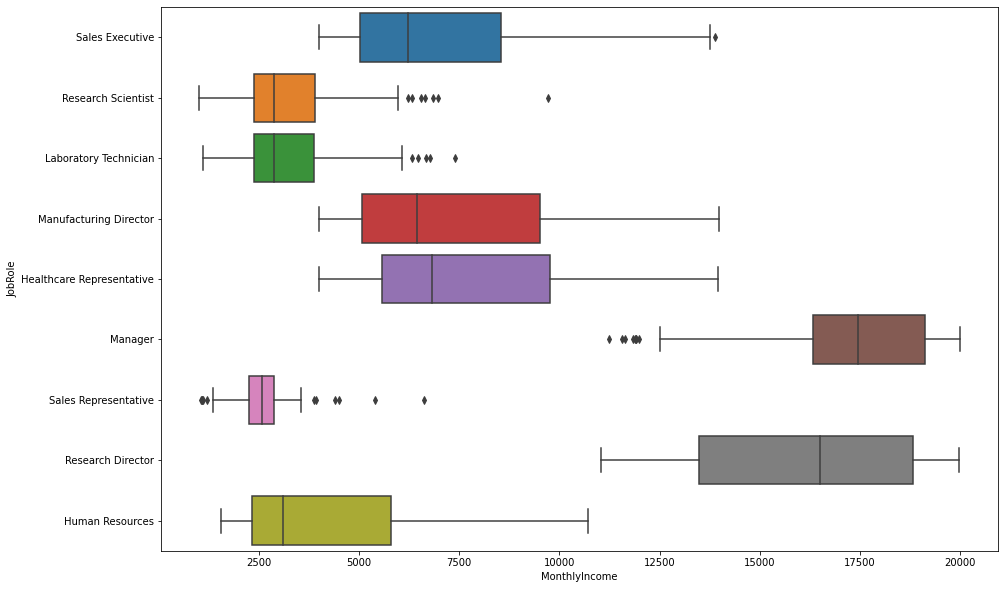

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=employee_df);

# PRÉ-PORCESSAMENTO E BASES DE TREINAMENTO/TESTE

In [23]:
employee_df.head()
#visualização dos dados iniciais da base

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [24]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat
#criando uma nova variável,para uma conversão de strings para números
#dataframe categórica

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [25]:
# Male Female
# 1    0
# 0    1

# Single Married Divorced
# 1      0       0
# 0      1       0
# 0      0       1
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
#conversão de string para números

In [26]:
X_cat.shape

(1470, 26)

In [27]:
type(X_cat)

numpy.ndarray

In [28]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [29]:
employee_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [30]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical
#criando variáveis restante
#dataframe númerica

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [32]:
X_all = pd.concat([X_cat, X_numerical], axis = 1 )
X_all
#concatenação para unir os dois dataframes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
#deixar todos os valores na mesma escala

In [34]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [35]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#dividir a base em duas. Divisão entre base de teste e base de treinamento

In [37]:
X_train.shape, y_train

((1102, 50), 682     0
 318     0
 1257    1
 1412    0
 190     0
        ..
 1407    0
 96      0
 1180    0
 178     0
 1135    0
 Name: Attrition, Length: 1102, dtype: int64)

In [38]:
X_test.shape, y_test

((368, 50), 556     0
 595     1
 1375    1
 943     0
 559     0
        ..
 1260    0
 1342    0
 1011    0
 942     0
 309     0
 Name: Attrition, Length: 368, dtype: int64)

# REGRESSÃO LOGÍSTICA

In [39]:
from sklearn.linear_model import LogisticRegression
#importação de biblioteca 

In [40]:
logistic = LogisticRegression() #criando uma variável
logistic.fit(X_train, y_train) #encaixar os dados de treinamento

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = logistic.predict(X_test) #criando variável de teste
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [42]:
y_test #comparando a variável

556     0
595     1
1375    1
943     0
559     0
       ..
1260    0
1342    0
1011    0
942     0
309     0
Name: Attrition, Length: 368, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score
#importação de biblioteca para fazer comparações entre os registros reais e as previsões

In [44]:
accuracy_score(y_test, y_pred)
#equivale 88% de chances de acerto

0.8858695652173914

In [45]:
from sklearn.metrics import confusion_matrix
#importando a matriz de confusão, para conseguir analisar os resultados


In [46]:
cm = confusion_matrix(y_test, y_pred) #criando uma variável para matriz de confusão
cm

array([[298,  10],
       [ 32,  28]])

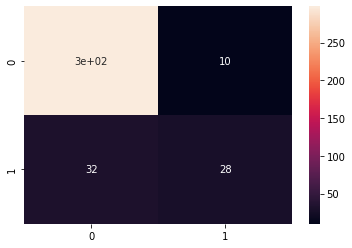

In [47]:
sns.heatmap(cm, annot=True);
#visualização da matriz de confusão

In [49]:
#precision
28 / (28 + 3)

0.9032258064516129

In [51]:
#recall
28 / (28 + 32)

0.4666666666666667

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       308
           1       0.74      0.47      0.57        60

    accuracy                           0.89       368
   macro avg       0.82      0.72      0.75       368
weighted avg       0.88      0.89      0.88       368



#RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier
#algoritimo de combinação para várias árvores de decisões

In [59]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
accuracy_score(y_test, y_pred)

0.8858695652173914

In [61]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[298,  32],
       [ 10,  28]])

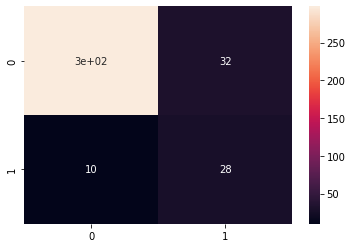

In [62]:
sns.heatmap(cm, annot=True);

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       308
           1       0.74      0.47      0.57        60

    accuracy                           0.89       368
   macro avg       0.82      0.72      0.75       368
weighted avg       0.88      0.89      0.88       368



#REDES NEURAIS ARTIFICIAIS

In [64]:
import tensorflow as tf
#BIBLIOTECA USADA PARA DEEP LEARNING

In [65]:
X_train.shape
#

(1102, 50)

In [66]:
(50 + 1) / 2

25.5

In [67]:
rede_neural = tf.keras.models.Sequential() #criando rede neural
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,))) 
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [68]:
rede_neural.summary()
#camadas

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [69]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
#compilando rede neural

In [70]:
rede_neural.fit(X_train, y_train, epochs=200)
#treinamento da rede neural

Epoch 1/200
35/35 [==============================] - 1s 2ms/step - loss: 0.5902 - accuracy: 0.7477
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8394
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8394
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8394
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8394
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8394
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8394
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8430
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8603
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8693
Epoch 11/

In [71]:
y_pred = rede_neural.predict(X_test)
y_pred
#avaliando algoritimo

array([[1.87492073e-02],
       [1.69086940e-13],
       [9.60526109e-01],
       [3.61104831e-12],
       [1.00000000e+00],
       [9.28432564e-06],
       [1.00000000e+00],
       [9.95492101e-01],
       [9.99965191e-01],
       [7.24098754e-07],
       [9.99990702e-01],
       [9.99999642e-01],
       [9.31552012e-15],
       [1.48518309e-08],
       [1.48634924e-10],
       [9.44754720e-01],
       [4.28946005e-05],
       [6.68316898e-06],
       [9.99744654e-01],
       [8.63301750e-07],
       [9.22532103e-12],
       [3.68238834e-05],
       [5.62694669e-03],
       [1.12142247e-10],
       [1.48650042e-05],
       [9.98794913e-01],
       [1.38283013e-07],
       [1.95739673e-08],
       [3.65392627e-09],
       [5.73277797e-12],
       [1.18653975e-06],
       [1.00000000e+00],
       [1.40487913e-10],
       [2.21761021e-12],
       [4.91059079e-19],
       [2.10756464e-11],
       [5.09377393e-12],
       [3.36504584e-08],
       [1.16580999e-14],
       [3.42642534e-06],


In [72]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

In [73]:
cm = confusion_matrix(y_test, y_pred)
cm #gerando matriz de confusão

array([[265,  43],
       [ 32,  28]])

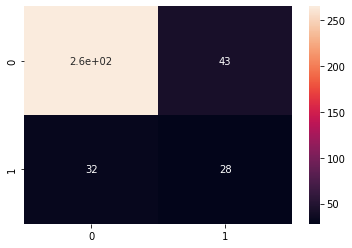

In [74]:
sns.heatmap(cm, annot=True);

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       308
           1       0.39      0.47      0.43        60

    accuracy                           0.80       368
   macro avg       0.64      0.66      0.65       368
weighted avg       0.81      0.80      0.80       368

